### Import modules

In [1]:
import numpy as np
import pandas as pd
import importlib
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats

import sys
sys.path.append("../")
import bayseg

In [2]:
import matplotlib.image as mpimg

In [3]:
ppl = mpimg.imread('../data/thin_section/AP1_S1_PPL.png')
xpl = mpimg.imread('../data/thin_section/AP1_S1_XPL.png')

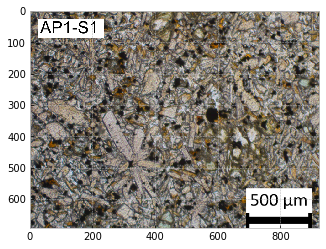

In [4]:
plt.imshow(ppl)

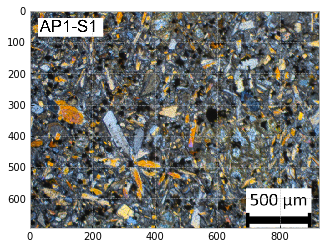

In [5]:
plt.imshow(xpl)

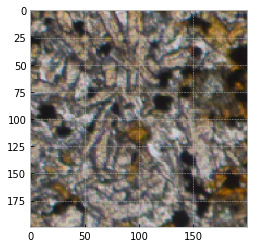

In [6]:
sub_x_min = 100
sub_x_max = 300
sub_y_min = 100
sub_y_max = 300

sub_ppl = ppl[sub_x_min:sub_x_max,sub_y_min:sub_y_max]
plt.imshow(sub_ppl)

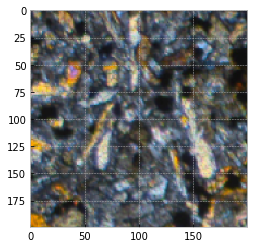

In [7]:
sub_xpl = xpl[sub_x_min:sub_x_max,sub_y_min:sub_y_max]
plt.imshow(sub_xpl)

### Combine data sets

In [8]:
data = np.stack([sub_ppl[:,:,:3], sub_xpl[:,:,:3]])

In [9]:
data = np.empty((sub_x_max-sub_x_min,sub_y_max-sub_y_min,6))

In [10]:
data[:,:,:3] = sub_ppl[:,:,:3]
data[:,:,3:] = sub_xpl[:,:,:3]

In [11]:
data.shape

(200, 200, 6)

### Visualizing the data set

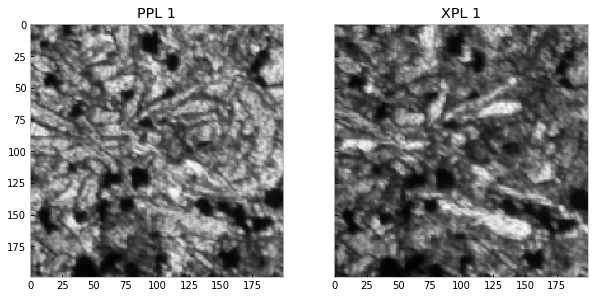

In [12]:
# get min and max of the data
dmin = np.nanmin(data)
dmax = np.nanmax(data)

# create figure
fig, ax = plt.subplots(ncols=2, figsize=(10,5), sharex=True, sharey=True)
# plot features onto axes
ax[0].imshow(data[:,:,1].T, cmap="gray")
ax[0].set_title("PPL 1")
ax[1].imshow(data[:,:,4].T, cmap="gray")
ax[1].set_title("XPL 1")

for i in range(2):
    ax[i].grid(False)

Replace NaN feature values

In [13]:
data[np.isnan(data)] = -1

### Instantiate classifier

In [14]:
clf = bayseg.BaySeg(data[:,:,:], 5, beta_init=10)

### Fit

In [15]:
n_iter = 100
clf.fit(n_iter, beta_jump_length=0.1)

100%|██████████| 100/100 [00:57<00:00,  1.59it/s]


### Diagnostics plot

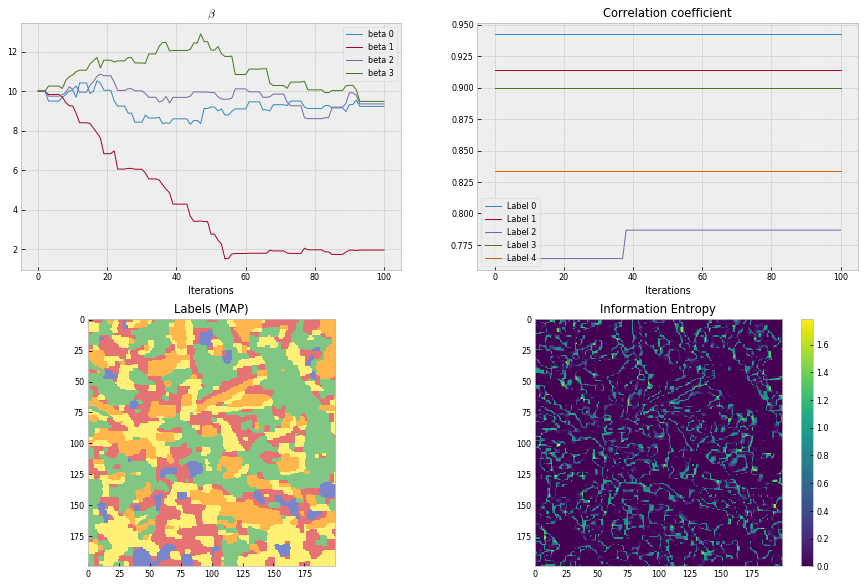

In [16]:
clf.diagnostics_plot(transpose=True)

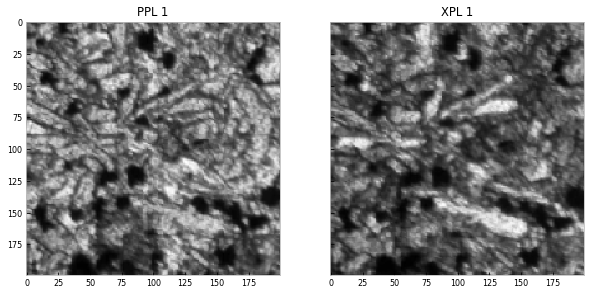

In [17]:
# create figure
fig, ax = plt.subplots(ncols=2, figsize=(10,5), sharex=True, sharey=True)
# plot features onto axes
ax[0].imshow(data[:,:,1].T, cmap="gray")
ax[0].set_title("PPL 1")
ax[1].imshow(data[:,:,4].T, cmap="gray")
ax[1].set_title("XPL 1")

for i in range(2):
    ax[i].grid(False)

Run the following code cell and use the interactive slider to move through the segmentation results of different iterations.

In [18]:
tmp = np.argmax(clf.labels_probability, axis=-1)
last_seg = tmp[-1].reshape((sub_x_max-sub_x_min,sub_y_max-sub_y_min)).T

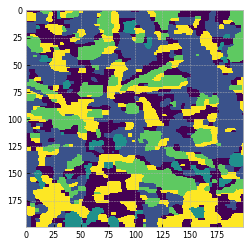

In [19]:
plt.imshow(last_seg)

In [20]:
from skimage.feature import canny
from skimage.filters import sobel
from skimage.morphology import watershed
from skimage.filters import roberts, sobel, scharr, prewitt

/Users/flow/anaconda3/envs/tf/lib/python3.7/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from int64 to float64
  .format(dtypeobj_in, dtypeobj_out))


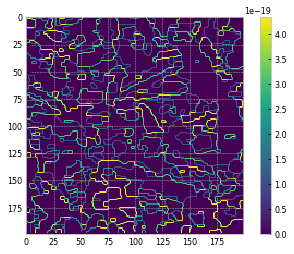

In [21]:
plt.imshow(roberts(last_seg))
plt.colorbar()

In [22]:
img_edges = roberts(last_seg)

In [23]:
type(img_edges)

numpy.ndarray

In [24]:
img_edges[img_edges>0]=1
img_edges[img_edges==0]=np.nan

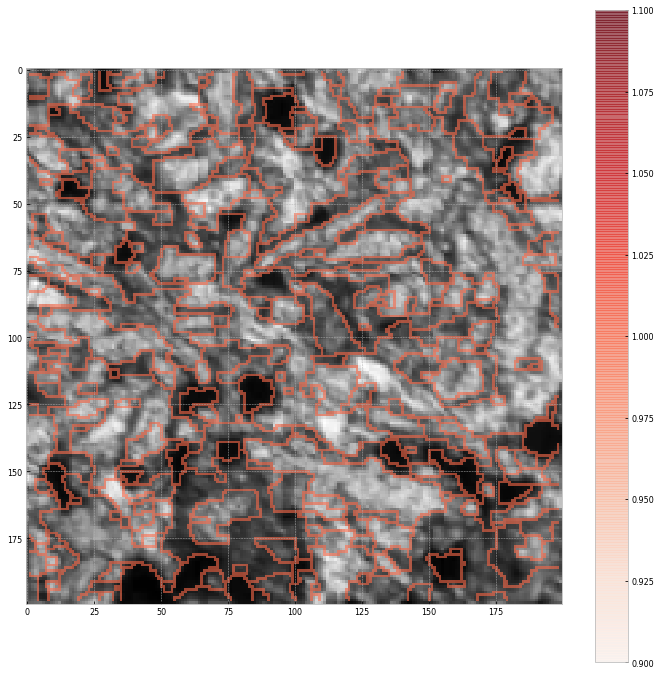

In [25]:
plt.figure(figsize=(12,12))
plt.imshow(data[:,:,1].T, cmap="gray")
plt.imshow(img_edges, cmap="Reds", alpha=0.6)
plt.colorbar()

In [26]:
np.nanmax(img_edges)

1.0

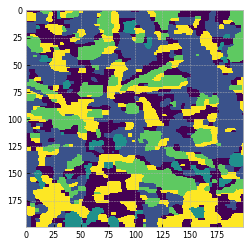

In [27]:
plt.imshow(last_seg)

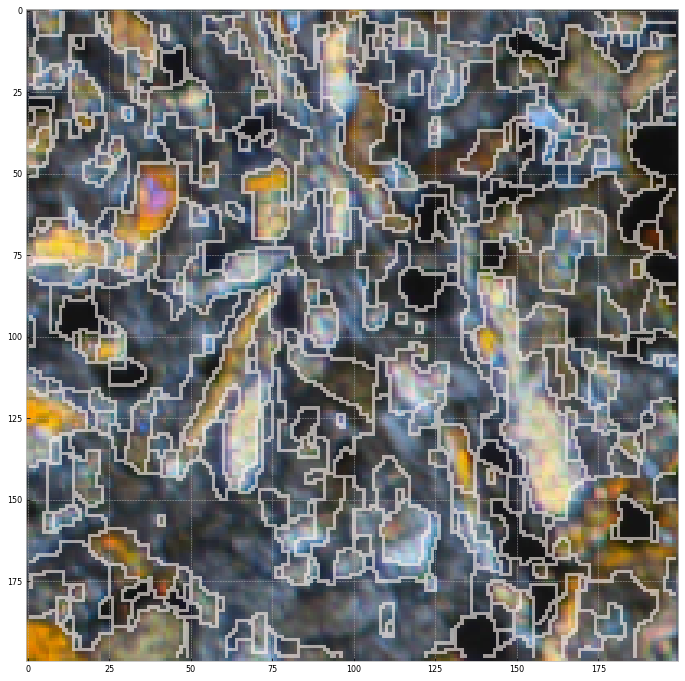

In [28]:
plt.figure(figsize=(12,12))
plt.imshow(sub_xpl) #, cmap="gray")
plt.imshow(img_edges.T, cmap="Reds", alpha=0.6)
# plt.colorbar()
# plt.imshow(sub_xpl)

In [29]:
last_seg[60,125]

4

In [85]:
tmp = last_seg==3

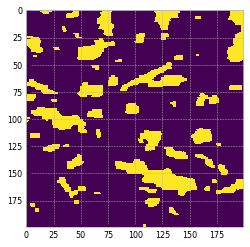

In [86]:
plt.imshow(tmp)

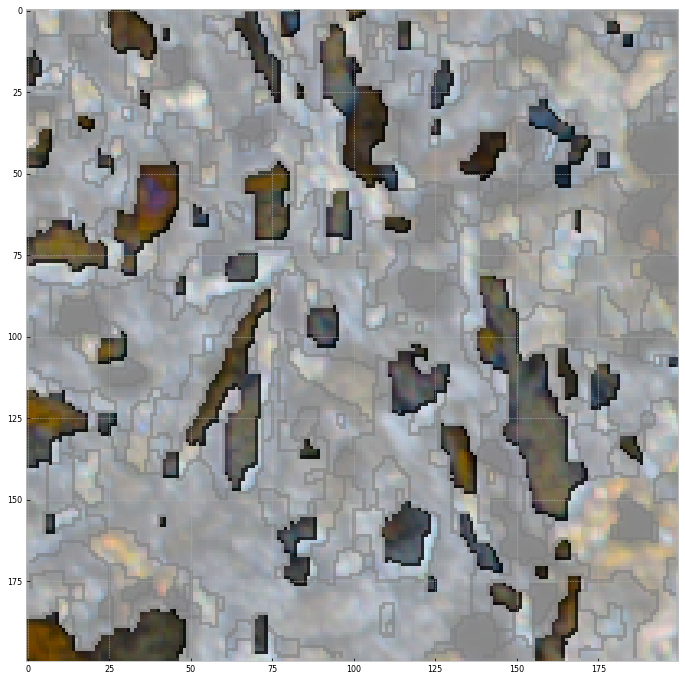

In [89]:
plt.figure(figsize=(12,12))
plt.imshow(sub_xpl) #, cmap="gray")
plt.imshow(img_edges.T, cmap="gray", alpha=0.6)
plt.imshow(tmp.T, cmap='gray_r', alpha=0.5)

In [84]:
mask3D = np.atleast_3d(tmp.T)*np.ones_like(sub_xpl)

In [80]:
m_img_col  = np.ma.masked_where( mask3D, sub_xpl)

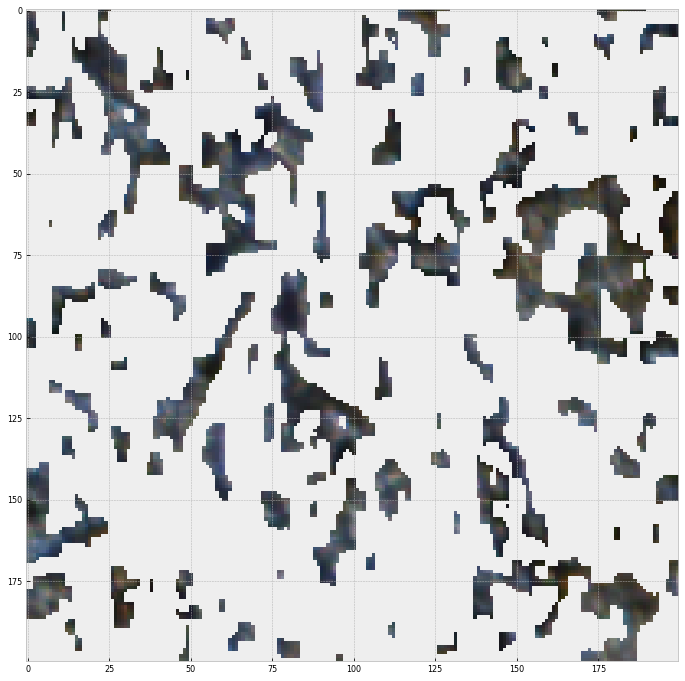

In [42]:
plt.figure(figsize=(12,12))
plt.imshow(mask3D*sub_xpl) #, cmap="gray")

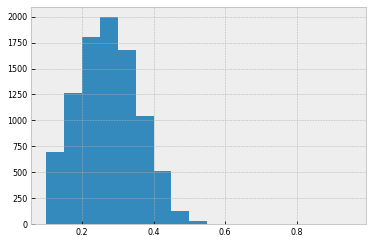

In [43]:
plt.hist((mask3D[:,:,1]*sub_xpl[:,:,1]).ravel(), bins=np.arange(0.1,1.0,0.05));

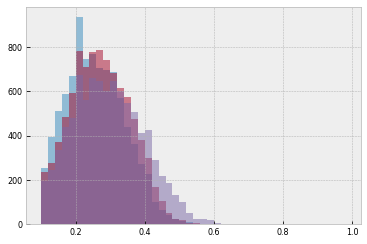

In [54]:
tmp = last_seg==0
mask3D = np.atleast_3d(tmp.T)*np.ones_like(sub_xpl)
plt.hist((mask3D[:,:,0]*sub_xpl[:,:,0]).ravel(), bins=np.arange(0.1,1.0,0.02), alpha=0.5);
plt.hist((mask3D[:,:,1]*sub_xpl[:,:,1]).ravel(), bins=np.arange(0.1,1.0,0.02), alpha=0.5);
plt.hist((mask3D[:,:,2]*sub_xpl[:,:,2]).ravel(), bins=np.arange(0.1,1.0,0.02), alpha=0.5);

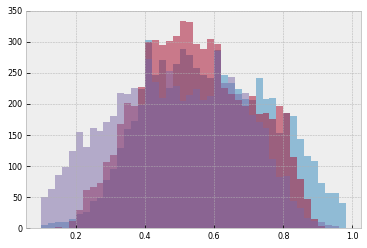

In [53]:
tmp = last_seg==3
mask3D = np.atleast_3d(tmp.T)*np.ones_like(sub_xpl)
plt.hist((mask3D[:,:,0]*sub_xpl[:,:,0]).ravel(), bins=np.arange(0.1,1.0,0.02), alpha=0.5);
plt.hist((mask3D[:,:,1]*sub_xpl[:,:,1]).ravel(), bins=np.arange(0.1,1.0,0.02), alpha=0.5);
plt.hist((mask3D[:,:,2]*sub_xpl[:,:,2]).ravel(), bins=np.arange(0.1,1.0,0.02), alpha=0.5);

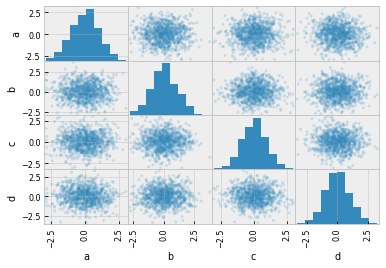

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
df = pandas.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])
pandas.plotting.scatter_matrix(df, alpha=0.2)
plt.show()


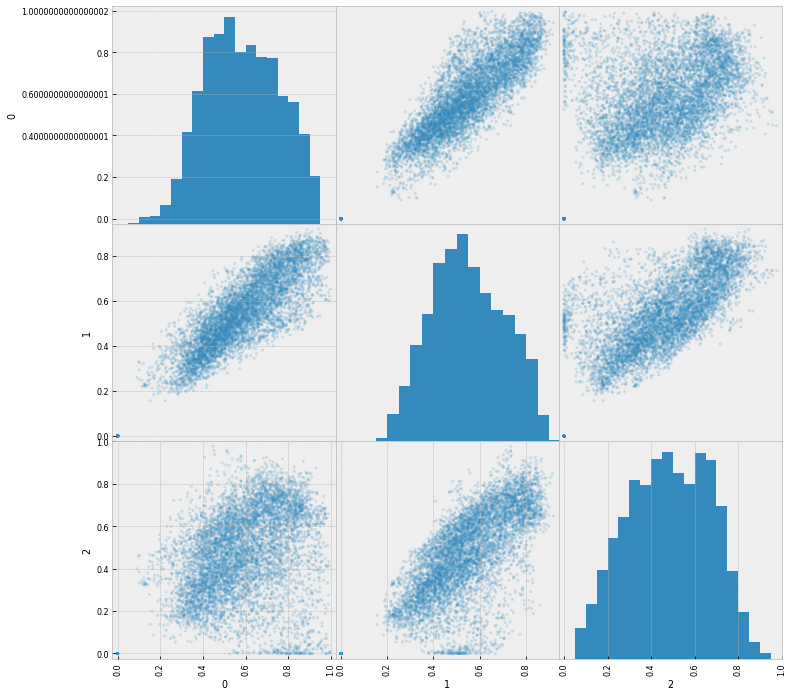

In [74]:
tmp = last_seg==3
mask3D = np.atleast_3d(tmp.T)*np.ones_like(sub_xpl)
sub_masked = sub_xpl * mask3D
sub_reshape = sub_masked.reshape(-1, sub_masked.shape[-1])
df = pandas.DataFrame(sub_reshape[:,:3])
pandas.plotting.scatter_matrix(df, alpha=0.2, figsize=(12,12), 
                               hist_kwds={'bins':np.arange(0.05,1.0,0.05)})
plt.show()

In [71]:
pandas.plotting.scatter_matrix?


Signature:
pandas.plotting.scatter_matrix(
    ['frame', 'alpha=0.5', 'figsize=None', 'ax=None', 'grid=False', "diagonal='hist'", "marker='.'", 'density_kwds=None', 'hist_kwds=None', 'range_padding=0.05', '**kwds'],
)
Docstring:
Draw a matrix of scatter plots.

Parameters
----------
frame : DataFrame
alpha : float, optional
    amount of transparency applied
figsize : (float,float), optional
    a tuple (width, height) in inches
ax : Matplotlib axis object, optional
grid : bool, optional
    setting this to True will show the grid
diagonal : {'hist', 'kde'}
    pick between 'kde' and 'hist' for
    either Kernel Density Estimation or Histogram
    plot in the diagonal
marker : str, optional
    Matplotlib marker type, default '.'
hist_kwds : other plotting keyword arguments
    To be passed to hist function
density_kwds : other plotting keyword arguments
    To be passed to kernel density estimate plot
range_padding : float, optional
    relative extension of axis range in x and y
    